# Load Libraries.

In [98]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load Dataset

In [99]:
data = pd.read_csv('shopping_trends_updated.csv')
data.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


## Some informations

In [100]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

In [102]:
data.columns

Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Shipping Type',
       'Discount Applied', 'Promo Code Used', 'Previous Purchases',
       'Payment Method', 'Frequency of Purchases'],
      dtype='object')

## Missing Data ?

In [103]:
data.isnull().sum()

Customer ID               0
Age                       0
Gender                    0
Item Purchased            0
Category                  0
Purchase Amount (USD)     0
Location                  0
Size                      0
Color                     0
Season                    0
Review Rating             0
Subscription Status       0
Shipping Type             0
Discount Applied          0
Promo Code Used           0
Previous Purchases        0
Payment Method            0
Frequency of Purchases    0
dtype: int64

## Somme statistics

In [104]:
data.describe()

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1950.500000,44.068462,59.764359,3.749949,25.351538
std,1125.977353,15.207589,23.685392,0.716223,14.447125
min,1.000000,18.000000,20.000000,2.500000,1.000000
25%,975.750000,31.000000,39.000000,3.100000,13.000000
50%,1950.500000,44.000000,60.000000,3.700000,25.000000
75%,2925.250000,57.000000,81.000000,4.400000,38.000000
max,3900.000000,70.000000,100.000000,5.000000,50.000000


## Some Filtering and Vizualisation

Clothing       1737
Accessories    1240
Footwear        599
Outerwear       324
Name: Category, dtype: int64


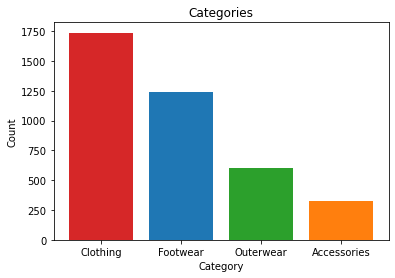

In [266]:
## Categories
categories = data.loc[:, 'Category'].unique()
number = (data.loc[:, 'Category'].value_counts()).values

categories_kinds = data.loc[:, 'Category'].value_counts()
print(categories_kinds)


## Plots
fig, ax = plt.subplots()
bar_colors = ['tab:red', 'tab:blue', 'tab:green', 'tab:orange']
ax.bar(categories, number, color = bar_colors)
ax.set_ylabel('Count')
ax.set_xlabel('Category')
ax.set_title('Categories')
plt.show()



Blouse     171
Pants      171
Shirt      169
Dress      166
Sweater    164
Socks      159
Skirt      158
Shorts     157
Hoodie     151
T-shirt    147
Jeans      124
Name: Item Purchased, dtype: int64


<ipython-input-259-8359dbf00e69>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(clothing.index,rotation=15)


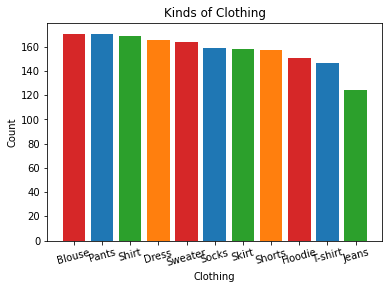

In [259]:
## Clothing Category : different kinds
clothing_kinds = pd.Series(data[data['Category'] == 'Clothing'].loc[:,'Item Purchased'].unique())
number = pd.Series(data[data['Category'] == 'Clothing'].loc[:,'Item Purchased'].value_counts())

clothing = pd.Series(data[data['Category'] == 'Clothing'].loc[:,'Item Purchased'].value_counts())
print(clothing)

## Plots
fig, ax = plt.subplots()
bar_colors = ['tab:red', 'tab:blue', 'tab:green', 'tab:orange', 'tab:red', 'tab:blue', 'tab:green', 'tab:orange', 'tab:red', 'tab:blue', 'tab:green']
ax.bar(clothing_kinds, number, color = bar_colors)
ax.set_ylabel('Count')
ax.set_xlabel('Clothing')
ax.set_xticklabels(clothing.index,rotation=15)
ax.set_title('Kinds of Clothing')
plt.show()



Sandals     160
Shoes       150
Sneakers    145
Boots       144
Name: Item Purchased, dtype: int64


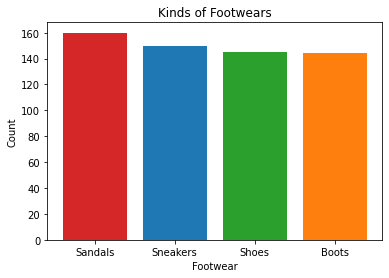

In [267]:
## Footwear Category : different kinds
footwear_kinds = pd.Series(data[data['Category'] == 'Footwear'].loc[:,'Item Purchased'].unique())
number = pd.Series(data[data['Category'] == 'Footwear'].loc[:,'Item Purchased'].value_counts())

footwear = pd.Series(data[data['Category'] == 'Footwear'].loc[:,'Item Purchased'].value_counts())
print(footwear)

## Plots
fig, ax = plt.subplots()
bar_colors = ['tab:red', 'tab:blue', 'tab:green', 'tab:orange']
ax.bar(footwear_kinds, number, color = bar_colors)
ax.set_ylabel('Count')
ax.set_xlabel('Footwear')
ax.set_title('Kinds of Footwears')
plt.show()


Jacket    163
Coat      161
Name: Item Purchased, dtype: int64


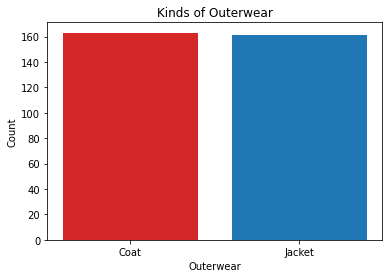

In [231]:
## Outerwear Category : different kinds
outerwear_kinds = pd.Series(data[data['Category'] == 'Outerwear'].loc[:,'Item Purchased'].unique())
number = pd.Series(data[data['Category'] == 'Outerwear'].loc[:,'Item Purchased'].value_counts())

outerwear = pd.Series(data[data['Category'] == 'Outerwear'].loc[:,'Item Purchased'].value_counts())
print(outerwear)

## Plots
fig, ax = plt.subplots()
bar_colors = ['tab:red', 'tab:blue']#, 'tab:green', 'tab:orange']
ax.bar(outerwear_kinds, number, color = bar_colors)
ax.set_ylabel('Count')
ax.set_xlabel('Outerwear')
ax.set_title('Kinds of Outerwear')
plt.show()


Jewelry       171
Sunglasses    161
Belt          161
Scarf         157
Hat           154
Handbag       153
Backpack      143
Gloves        140
Name: Item Purchased, dtype: int64


<ipython-input-273-d7d06161bd26>:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(acessories.index,rotation=15)


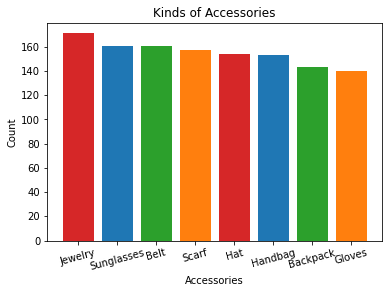

In [273]:
## Accessories Category : different kinds
acessories_kinds = pd.Series(data[data['Category'] == 'Accessories'].loc[:,'Item Purchased'].unique())
number = pd.Series(data[data['Category'] == 'Accessories'].loc[:,'Item Purchased'].value_counts())

acessories = pd.Series(data[data['Category'] == 'Accessories'].loc[:,'Item Purchased'].value_counts())
print(acessories)
acces = ['Jewelry', 'Sunglasses', 'Belt', 'Scarf','Hat', 'Handbag', 'Backpack', 'Gloves']

## Plots
fig, ax = plt.subplots()
bar_colors = ['tab:red', 'tab:blue', 'tab:green', 'tab:orange', 'tab:red', 'tab:blue', 'tab:green', 'tab:orange']
ax.bar(acessories_kinds, number, color = bar_colors)
ax.set_ylabel('Count')
ax.set_xlabel('Accessories')
ax.set_xticklabels(acessories.index,rotation=15)
ax.set_title('Kinds of Accessories')
plt.show()
